![](https://pbs.twimg.com/profile_images/789117657714831361/zGfknUu8_400x400.jpg)

#  **Welcome :)** <br><br>

Before starting the analysis, I would like to welcome you coming to my kernel! I recently got into this amazing Kaggle world ❤️️ <br>I have been enjoying this learning journey and building a great network with Data Enthusiasts like you!<br>  In this Kaggle tutorial, I will go over how to approach and build Gradient Boosting models with the help of exploratory data analysis (EDA) and feature engineering on [The Movie Database](https://www.themoviedb.org/). I will try to be thorough as much as possible! Hope that you will enjoy a little festival here and stay warm.....! (especially for eople living in the Midwestern region in the US)

<br>
<img src="https://media.giphy.com/media/piJE8Q4AVfs4vsABAF/giphy.gif "  height="300px" width="300px">

<br>
## **The Goal of the Competition:**<br>

Using metadata on over 7,000 past films from The Movie Database, I will predict their overall worldwide box office revenue.

## **Simplified Version of How to Start with Gradient Boosting Models:** <br>

1. Perform an Exploratory Data Analysis (EDA) on the dataset <br>
2. Feature engineering: take the features that you already have and combine them or extract more information <br>
3. Build a quick and dirty model, or a baseline model, which can serve as a comparison against later models that you will build <br>
4. Monitor performance and early stopping for avoiding model fitting issues. Also take a look at feature importance of variables and check whether the variables that you are seeing make sense <br>
5. Tune parameters of models (I usually focus on tuning parameters for Tree Booster, such as eta, max_depth, min_child_weight). <br>
6. Compare different models by metric (ex. RMSE) <br>
7. Get a model that performs better! 



## **Special Thanks to:** <br>


[Andrew Lukyanenko's kernel](https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation), [Kamal Chhirang's kernel](https://www.kaggle.com/kamalchhirang/eda-simple-feature-engineering-external-data/notebook), and  [Shubhammank's kernel](https://www.kaggle.com/shubhammank/tmdb-eda). I learned a lot from their kernels, and I highly recommend you to take a look at them! (one of reaons that Kaggle is so awesome)




# **Let the Party Begin!**

<img src="https://media.giphy.com/media/26ufm5ivPHbIV81AQ/giphy.gif "  height="700px" width="700px">

# **Loading the dataset and libraries**

In [1]:
import numpy as np 
import pandas as pd 
import os
import json
from pandas.io.json import json_normalize
import ast
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
%matplotlib notebook
from scipy.stats import skew, boxcox
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.mplot3d import Axes3D
import ast
import re
import yaml
import json
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import eli5
import time
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import warnings  
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


D:\python\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\python\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\python\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sam_sub = pd.read_csv('../input/sample_submission.csv')
print( "train dataset:", train.shape,"\n","test dataset: ",test.shape,"\n","sample_submission dataset:", sam_sub .shape)

train dataset: (3000, 23) 
 test dataset:  (4398, 22) 
 sample_submission dataset: (4398, 2)


## **Attribute Explanation**

** ID **  - 每部电影的整数唯一ID

** Belongs_to_collection **  - 包含JSON格式的电影的TMDB ID，名称，电影海报和背景URL。你可以看到这样的海报和背景图像：https：//image.tmdb.org/t/p/original/。示例：https：//image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg

**Budget**：以美元计算的电影预算。 0值意味着未知。

**Genres** ：包含JSON格式的所有类型名称和TMDB Id

**Homepage**  - 包含电影的官方主页网址。示例：http：//sonyclassics.com/whiplash/，这是Whiplash电影的主页。

** Imdb_id **  - 电影的IMDB ID（字符串）。您可以访问IMDB页面，如下所示：https：//www.imdb.com/title/

** Original_language **  - 原始语言的两位数代码，用于制作电影。喜欢：en =英语，fr =法语。

** Original_title **  - 电影的原始标题。如果原始标题不是英文，则标题和原始标题可能会有所不同。

**Overview**   - 电影的简要描述。

**Popularity**  - 浮动电影的流行。

** Poster_path **  - 电影的海报路径。你可以看到这样的完整图像：https：//image.tmdb.org/t/p/original/

** Production_companies **  - 电影的JSON格式的所有制作公司名称和TMDB ID。

** Production_countries **  -  JSON格式的制作公司的两位数代码和全名。

** Release_date **  - 以mm / dd / yy格式播放电影的日期。

**Runtime**  - 电影的总运行时间（分钟）（整数）。

** Spoken_languages **  - 两位数的代码和口语的全名。

**Status**  - 电影是否已发布或传闻？

**Tagline**  - 电影的标语

**Title**  - 电影的英文标题

**Keywords**  -  TMDB Id和JSON格式的所有关键字的名称。

** Cast **  - 所有演员的TMDB ID，姓名，角色名称，性别（1 =女性，2 =男性），采用JSON格式

**Crew**  - 姓名，TMDB身份证，各种船员工作的档案路径，如导演，作家，艺术，声音等。

**Revenue**  - 电影以美元赚取的总收入。

# **Just for fun: top revenue movies**

In [4]:
# All time winner in the dataset
train.loc[train['revenue'].idxmax(),['title','revenue','release_date']]

title           The Avengers
revenue           1519557910
release_date         4/25/12
Name: 1126, dtype: object

## **Top 5 Revenue Movies in the Dataset**


* 
<table><tr>
<td> <img src="https://is2-ssl.mzstatic.com/image/thumb/Video118/v4/04/6a/b4/046ab45e-6099-3e1a-ccef-7b3f8b07f057/contsched.sumsaanu.lsr/268x0w.jpg" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="https://images-na.ssl-images-amazon.com/images/I/81ClciXon2L._SY445_.jpg"  alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="https://upload.wikimedia.org/wikipedia/en/f/ff/Avengers_Age_of_Ultron_poster.jpg"  alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="https://upload.wikimedia.org/wikipedia/en/d/d6/Beauty_and_the_Beast_2017_poster.jpg"  alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="https://images-na.ssl-images-amazon.com/images/I/51BG6ovCJpL.jpg"  alt="Drawing" style="width: 300px;"/> </td>
</tr></table>

In [5]:
# Top 20 revenue movie in the dataset

train.sort_values(by='revenue', ascending=False).head(20)[['title','revenue','release_date']]

,title,revenue,release_date
1126,The Avengers,1519557910,4/25/12
1761,Furious 7,1506249360,4/1/15
2770,Avengers: Age of Ultron,1405403694,4/22/15
684,Beauty and the Beast,1262886337,3/16/17
2322,Transformers: Dark of the Moon,1123746996,6/28/11
906,The Dark Knight Rises,1084939099,7/16/12
2135,Pirates of the Caribbean: On Stranger Tides,1045713802,5/14/11
2562,Finding Dory,1028570889,6/16/16
881,Alice in Wonderland,1025491110,3/3/10
734,Zootopia,1023784195,2/11/16


# **Data Pre-processing & EDA**

In [6]:
#Let's take a look at the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [9]:
train.isna().sum().sort_values(ascending=True)

id                          0
title                       0
status                      0
release_date                0
popularity                  0
original_title              0
revenue                     0
imdb_id                     0
budget                      0
original_language           0
poster_path                 1
runtime                     2
genres                      7
overview                    8
cast                       13
crew                       16
spoken_languages           20
production_countries       55
production_companies      156
Keywords                  276
tagline                   597
homepage                 2054
belongs_to_collection    2396
dtype: int64

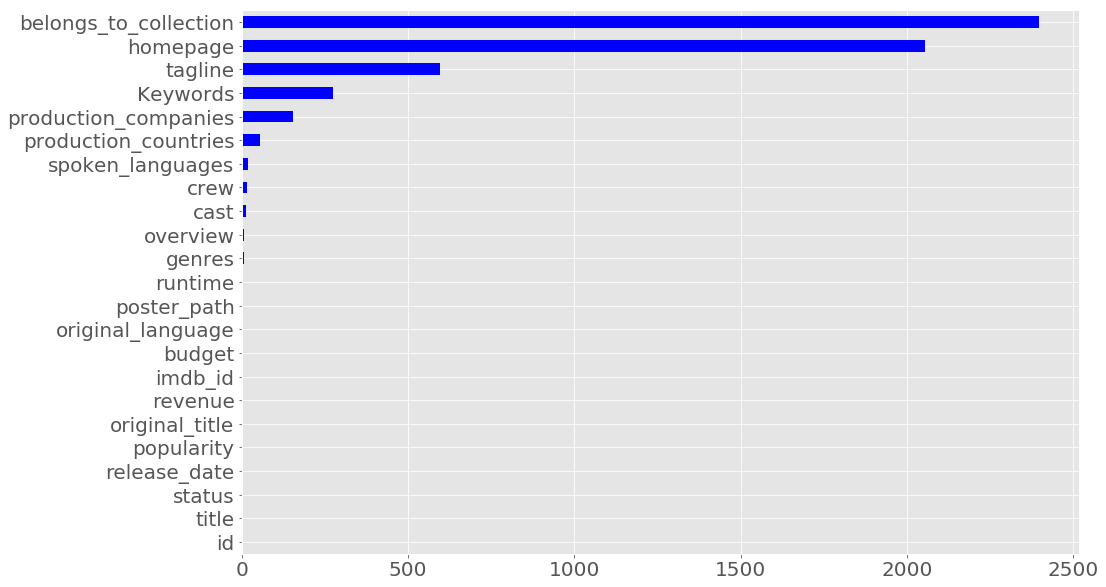

In [7]:
#Counting NA in dataset

fig = plt.figure(figsize=(15, 10))
train.isna().sum().sort_values(ascending=True).plot(kind='barh',colors='Blue', fontsize=20)


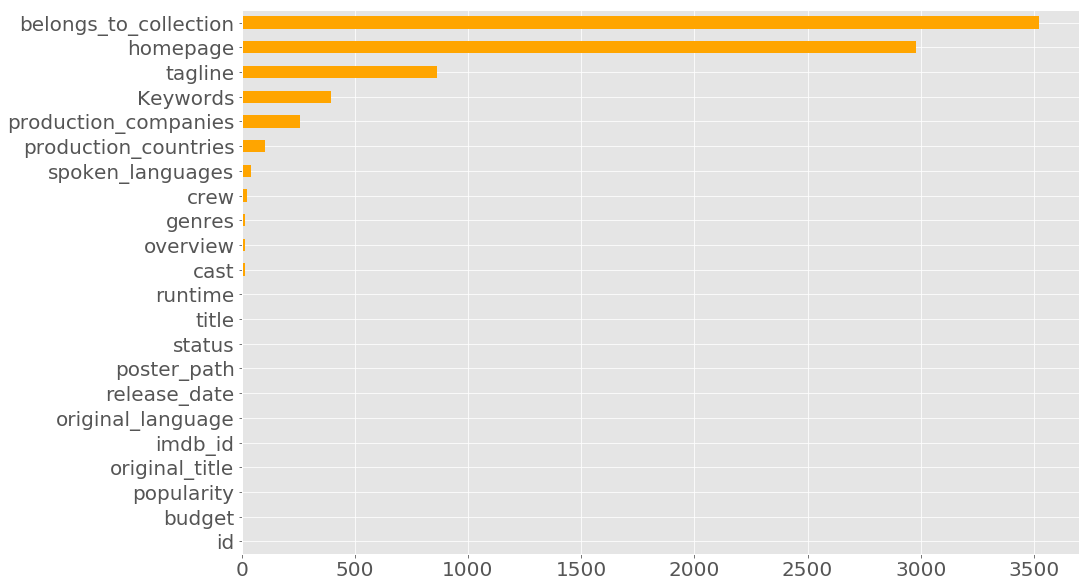

In [8]:
fig = plt.figure(figsize=(15, 10))
test.isna().sum().sort_values(ascending=True).plot(kind='barh',colors='Orange', fontsize=20)

The below information is from [B H's Kernel](https://www.kaggle.com/zero92/stacking-xgb-lgbm-cat-new-variables). His kernel has a nice analysis, so take a look at his kernel as well! 

In [9]:
# Revising some wrong information

train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1542,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

In [10]:
## From this function, you can convert release_date column from the character data type to the datetime data type

def date_features(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    df['release_quarter'] = df['release_date'].dt.quarter
    df.drop(columns=['release_date'], inplace=True)
    return df

train=date_features(train)
test=date_features(test)

train['release_year'].head(10)

0    2015
1    2004
2    2014
3    2012
4    2009
5    1987
6    2012
7    2004
8    1996
9    2003
Name: release_year, dtype: int64

There are some records that release above 2019 (coming from the future?!).<br> For these records, it probably makes sense to change the century (ex. 2065 --> 1965, we are not ready to accept you, 2065!!) 

In [11]:
train['release_year'].iloc[np.where(train['release_year']> 2019)][:10]

39     2065
41     2067
51     2065
61     2056
68     2062
109    2066
140    2068
144    2067
172    2066
187    2028
Name: release_year, dtype: int64

In [12]:
train['release_year']=np.where(train['release_year']> 2019, train['release_year']-100, train['release_year'])
test['release_year']=np.where(test['release_year']> 2019, test['release_year']-100, test['release_year'])

In [13]:
## Filling NA values with mode of each column

fillna_column = {'release_year':'mode','release_month':'mode',
                'release_day':'mode'}

for k,v in fillna_column.items():
    if v == 'mode':
        fill = train[k].mode()[0]
    else:
        fill = v
    print(k, ': ', fill)
    train[k].fillna(value = fill, inplace = True)
    test[k].fillna(value = fill, inplace = True)

release_year :  2013
release_month :  9
release_day :  1


In [14]:
# Putting revised year, month, and day together 

def year_month_together(df):
    year = df["release_year"].astype(int).copy().astype(str)
    month=df['release_month'].astype(int).copy().astype(str)
    day=df['release_day'].astype(int).copy().astype(str) 
    df["release_date"]=  month.str.cat(day.str.cat(year,sep="/"), sep ="/") 
    df['release_date']=pd.to_datetime(df['release_date'],format="%m/%d/%Y")
    df['release_dow'] = df['release_date'].dt.dayofweek
    return df 

train=year_month_together(train)
test=year_month_together(test)

train['release_date'].head(10)

0   2015-02-20
1   2004-08-06
2   2014-10-10
3   2012-03-09
4   2009-02-05
5   1987-08-06
6   2012-08-30
7   2004-01-15
8   1996-02-16
9   2003-04-16
Name: release_date, dtype: datetime64[ns]

From this interactive plot, we can tell that the majority of movies in the dataset released from 00s - 10s.<br>I am wondering the **sample bias issue** in the dataset. Since there are not many movies released from 90s, it is hard to compare movies from 90s and 00s-10s. 


In [15]:
# Counting movie number by release date

d1 = train['release_date'].value_counts().sort_index()
d2 = test['release_date'].value_counts().sort_index()
data = [go.Histogram(x=d1.index, y=d1.values, name='train'), go.Histogram(x=d2.index, y=d2.values, name='test')]
layout = go.Layout(dict(title = "Counts of release_date",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

Text(0, 0.5, 'Revenue (100 million dollars)')

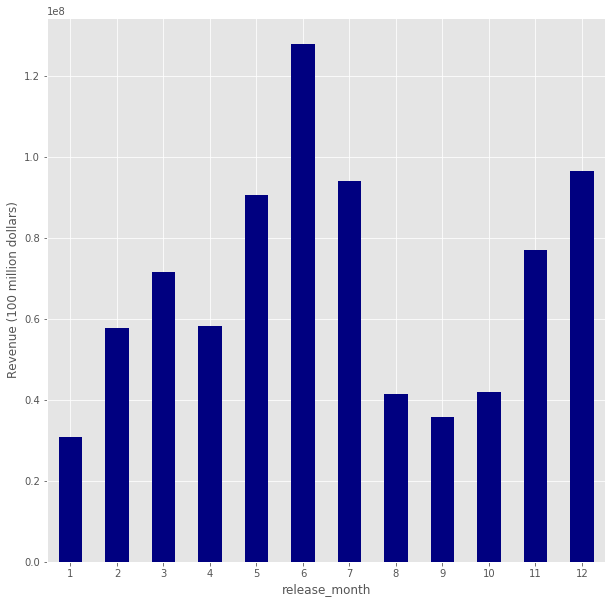

In [16]:
# Average revenue by month

fig = plt.figure(figsize=(10,10))

train.groupby('release_month').agg('mean')['revenue'].plot(kind='bar',color='navy',rot=0)
plt.ylabel('Revenue (100 million dollars)')

The popularity over years plot implies that the mean popularity of movies is increasing over year. Year 2017 has a high mean popularity in the train dataset

Text(0.5, 1.0, 'Mean Popularity Over Years')

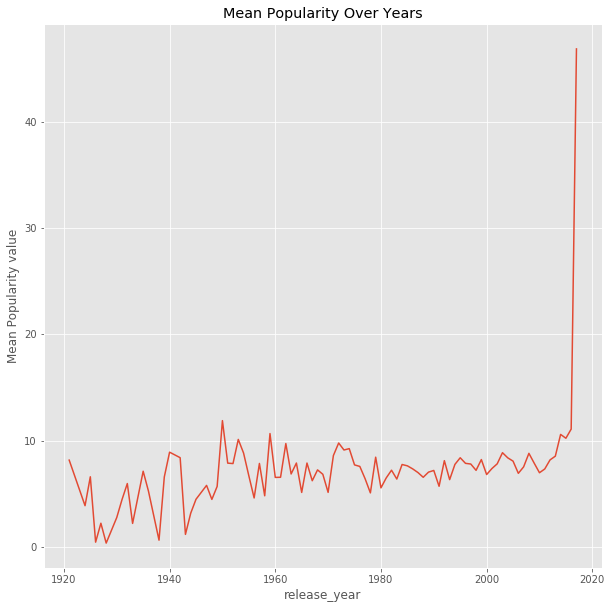

In [17]:
release_year_mean_data=train.groupby(['release_year'])['budget','popularity','revenue'].mean()
release_year_mean_data.head()

fig = plt.figure(figsize=(10, 10))
release_year_mean_data['popularity'].plot(kind='line')
plt.ylabel('Mean Popularity value')
plt.title('Mean Popularity Over Years')

We can also use 3D plot to invetigate the relationship between budget, revenue, and popularity of movies. <br>
  From the 3D plot and the corrplot, we can see that they have somewhat strong positive correlations to each other.

Text(0.5, 0, 'Popularity of the Movie')

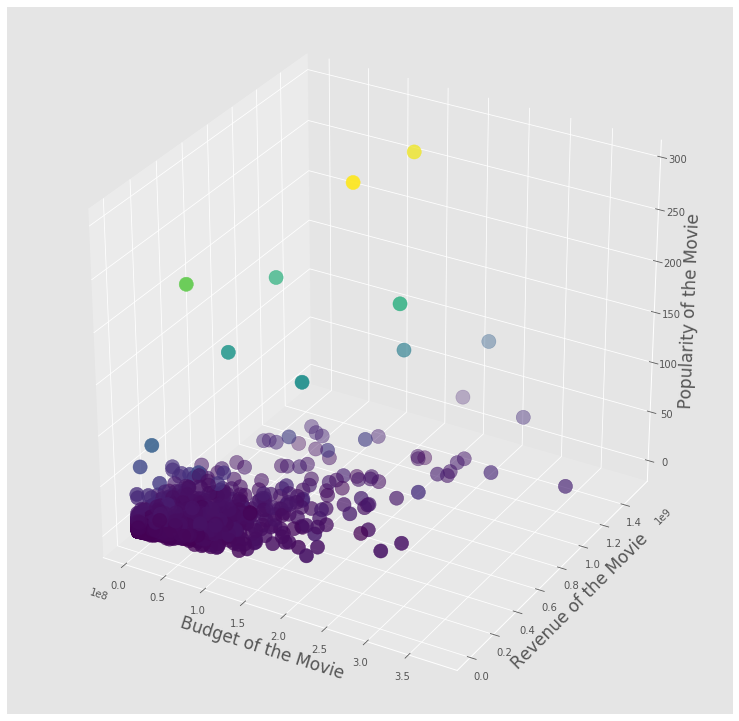

In [18]:
release_year_mean_data=train.groupby(['release_year'])['budget','popularity','revenue'].mean()
release_year_mean_data.head()

fig = plt.figure(figsize=(13,13))
ax = plt.subplot(111,projection = '3d')

# Data for three-dimensional scattered points
zdata =train.popularity
xdata =train.budget
ydata = train.revenue
ax.scatter3D(xdata, ydata, zdata, c=zdata, s = 200)
ax.set_xlabel('Budget of the Movie',fontsize=17)
ax.set_ylabel('Revenue of the Movie',fontsize=17)
ax.set_zlabel('Popularity of the Movie',fontsize=17)


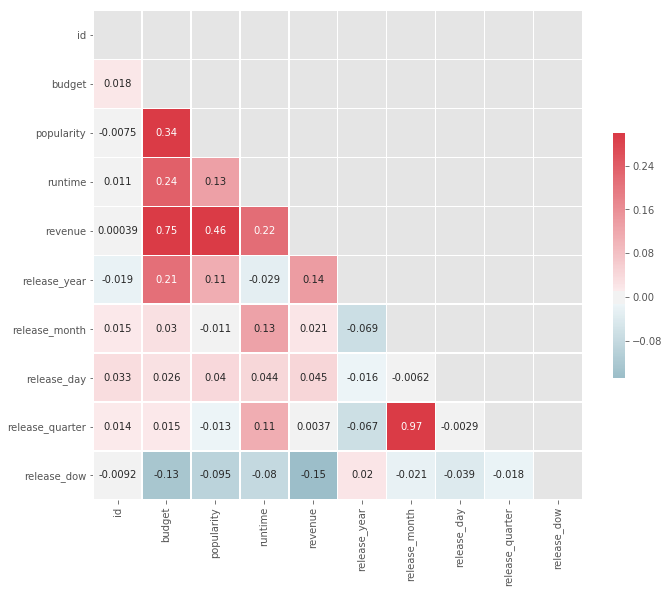

In [19]:
# Creating correlation matrix 

corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## **Json Format Columns to Dictionary Format**
<br>

In order to clean up the Json format columns, I am going to convert these columns to the dictionary format and analyze each column.

In [20]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

## **Belong_to collection**

In [21]:
# Counting NAs as 0
train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

In [22]:
train['collection_name'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

test['collection_name'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['has_collection'] = test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

train = train.drop(['belongs_to_collection'], axis=1)
test = test.drop(['belongs_to_collection'], axis=1)

In [23]:
# Most common collection 
train['collection_name'].value_counts()[1:10]

James Bond Collection                     16
Friday the 13th Collection                 7
The Pink Panther (Original) Collection     6
Pokémon Collection                         5
Police Academy Collection                  5
The Fast and the Furious Collection        4
Transformers Collection                    4
Alien Collection                           4
Rambo Collection                           4
Name: collection_name, dtype: int64

## **Genres**
<br>
Many genres of movies are drama and comedy in the train data. I am going to conduct text analysis on movie titles by genre and revenue comparison over years by genres.

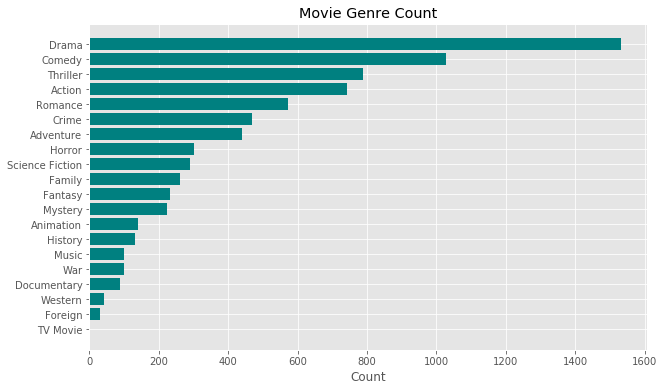

In [24]:
train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()
list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_genres=Counter([i for j in list_of_genres for i in j]).most_common()
fig = plt.figure(figsize=(10, 6))
data=dict(most_common_genres)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='teal')
plt.xlabel('Count')
plt.title('Movie Genre Count')
plt.show()


In [25]:
train['num_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0)
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    train['genre_' + g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)
    
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    test['genre_' + g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['genres'], axis=1)
test = test.drop(['genres'], axis=1)

There are 48476 words in the combination of all review.


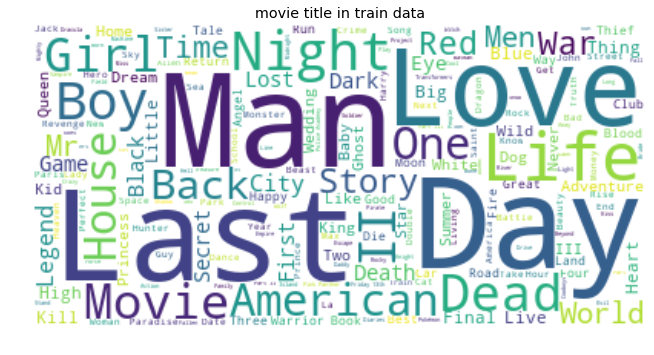

In [26]:
# Movie title text analysis 

text = " ".join(review for review in train.title)
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

fig = plt.figure(figsize=(11, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('movie title in train data')
plt.axis("off")
plt.show()

It is interesting to see the overlap of tiltles between Drama and Comedy and between Action and Thriller. 

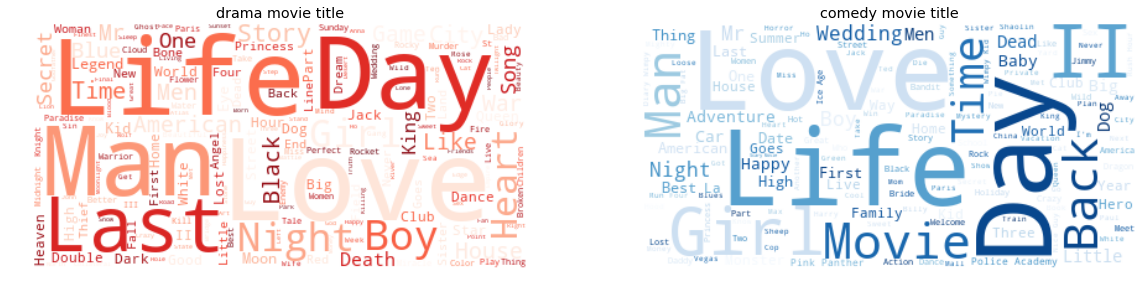

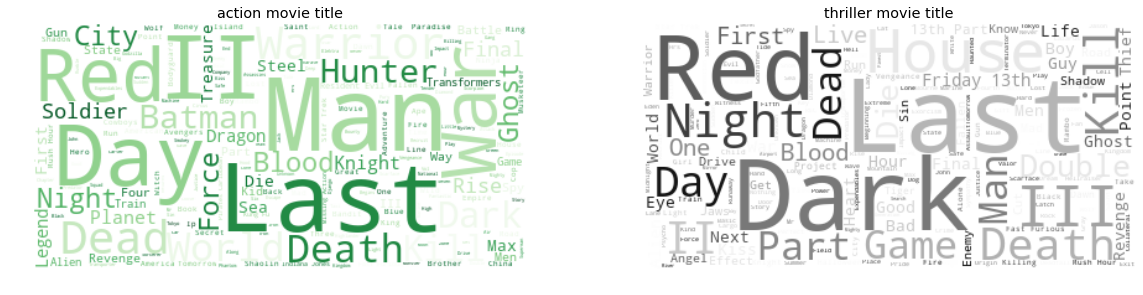

In [27]:
# Text analysis on top 4 movie genres title 

drama=train.loc[train['genre_Drama']==1,]
comedy=train.loc[train['genre_Comedy']==1,]
action=train.loc[train['genre_Action']==1,]
thriller=train.loc[train['genre_Thriller']==1,]



text_drama = " ".join(review for review in drama.title)
text_comedy = " ".join(review for review in comedy.title)
text_action = " ".join(review for review in action.title)
text_thriller = " ".join(review for review in thriller.title)


wordcloud1 = WordCloud(stopwords=stopwords, background_color="white",colormap="Reds").generate(text_drama)
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white",colormap="Blues").generate(text_comedy)
wordcloud3 = WordCloud(stopwords=stopwords, background_color="white",colormap="Greens").generate(text_action)
wordcloud4 = WordCloud(stopwords=stopwords, background_color="white",colormap="Greys").generate(text_thriller)


fig = plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('drama movie title')
plt.axis("off")

plt.subplot(222)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('comedy movie title')
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(20, 10))

plt.subplot(223)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title('action movie title')
plt.axis("off")

plt.subplot(224)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.title('thriller movie title')
plt.axis("off")
plt.show()


In [28]:
drama_revenue=drama.groupby(['release_year']).mean()['revenue']
comedy_revenue=comedy.groupby(['release_year']).mean()['revenue']
action_revenue=action_revenue=action.groupby(['release_year']).mean()['revenue']
thriller_revenue=thriller.groupby(['release_year']).mean()['revenue']

revenue_concat = pd.concat([drama_revenue,comedy_revenue,action_revenue,thriller_revenue], axis=1)
revenue_concat.columns=['drama','comedy','action','thriller']
revenue_concat.index=train.groupby(['release_year']).mean().index

Currently,  Action is doing pretty well compared to other genres (considering top 20 revenue movies, it makes sense). It is also interesting to see the peak revenue of Thriller during 1970s (It would have been terrible years for me..)

In [29]:
# Mean revenue over years by top 4 genres 

data = [go.Scatter(x=revenue_concat.index, y=revenue_concat.drama, name='drama'), go.Scatter(x=revenue_concat.index, y=revenue_concat.comedy, name='comedy'),
       go.Scatter(x=revenue_concat.index, y=revenue_concat.action, name='action'),go.Scatter(x=revenue_concat.index, y=revenue_concat.thriller, name='thriller')]
layout = go.Layout(dict(title = 'Mean Revenue by Top 4 Movie Genres Over Years',
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Revenue'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

## **Production Companies**

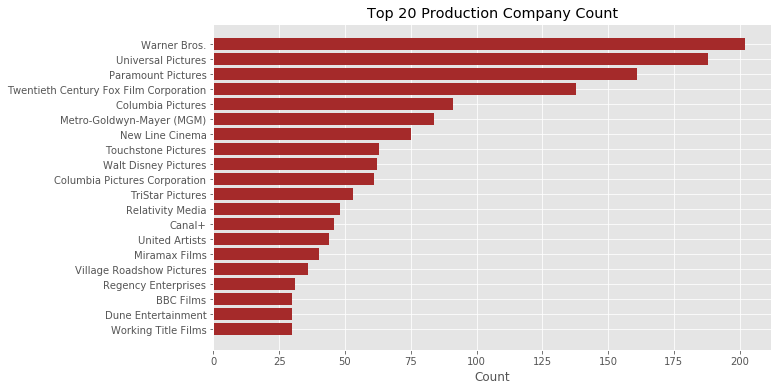

In [30]:
# Counting the frequency of production company 
list_of_companies = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

most_common_companies=Counter([i for j in list_of_companies for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data=dict(most_common_companies)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='brown')
plt.xlabel('Count')
plt.title('Top 20 Production Company Count')
plt.show()


In [31]:
train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
train['all_production_companies'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    train['production_company_' + g] = train['all_production_companies'].apply(lambda x: 1 if g in x else 0)
    
test['num_companies'] = test['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test['all_production_companies'] = test['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test['production_company_' + g] = test['all_production_companies'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_companies', 'all_production_companies'], axis=1)
test = test.drop(['production_companies', 'all_production_companies'], axis=1)

Text(0.5, 0, 'Revenue (100 million dollars)')

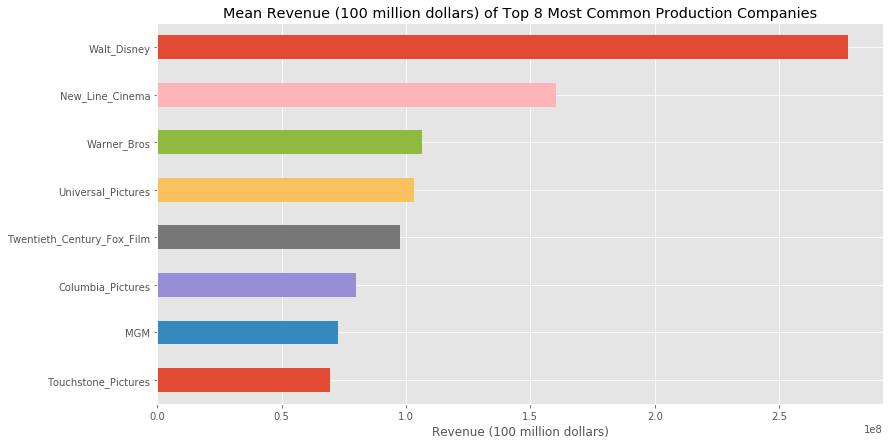

In [32]:
# Getting the mean revenue of top 8 most common production companies 

Warner_Bros=train.loc[train['production_company_Warner Bros.']==1,]
Universal_Pictures=train.loc[train['production_company_Universal Pictures']==1,]
Twentieth_Century_Fox_Film=train.loc[train['production_company_Twentieth Century Fox Film Corporation']==1,]
Columbia_Pictures=train.loc[train['production_company_Columbia Pictures']==1,]
MGM=train.loc[train['production_company_Metro-Goldwyn-Mayer (MGM)']==1,]
New_Line_Cinema=train.loc[train['production_company_New Line Cinema']==1,]
Touchstone_Pictures=train.loc[train['production_company_Touchstone Pictures']==1,]
Walt_Disney=train.loc[train['production_company_Walt Disney Pictures']==1,]

Warner_Bros_revenue=Warner_Bros.groupby(['release_year']).mean()['revenue']
Universal_Pictures_revenue=Universal_Pictures.groupby(['release_year']).mean()['revenue']
Twentieth_Century_Fox_Film_revenue=Twentieth_Century_Fox_Film.groupby(['release_year']).mean()['revenue']
Columbia_Pictures_revenue=Columbia_Pictures.groupby(['release_year']).mean()['revenue']
MGM_revenue=MGM.groupby(['release_year']).mean()['revenue']
New_Line_Cinema_revenue=New_Line_Cinema.groupby(['release_year']).mean()['revenue']
Touchstone_Pictures_revenue=Touchstone_Pictures.groupby(['release_year']).mean()['revenue']
Walt_Disney_revenue=Walt_Disney.groupby(['release_year']).mean()['revenue']


prod_revenue_concat = pd.concat([Warner_Bros_revenue,Universal_Pictures_revenue,Twentieth_Century_Fox_Film_revenue,Columbia_Pictures_revenue,
                                MGM_revenue,New_Line_Cinema_revenue,Touchstone_Pictures_revenue,Walt_Disney_revenue], axis=1)
prod_revenue_concat.columns=['Warner_Bros','Universal_Pictures','Twentieth_Century_Fox_Film','Columbia_Pictures','MGM','New_Line_Cinema','Touchstone_Pictures','Walt_Disney']

fig = plt.figure(figsize=(13, 7))
prod_revenue_concat.agg("mean",axis='rows').sort_values(ascending=True).plot(kind='barh',x='Production Companies',y='Revenue',title='Mean Revenue (100 million dollars) of Top 8 Most Common Production Companies')
plt.xlabel('Revenue (100 million dollars)')

![](https://www.thewrap.com/wp-content/uploads/2014/12/walt_disney_company_logo.jpg) <br>
<center>This Mickey is getting roughly 280 million in USD per movie released...😲 <strike>(time to get some shirts?)</strike> </center>

In [33]:
data = [go.Scatter(x=prod_revenue_concat.index, y=prod_revenue_concat.Warner_Bros, name='Warner_Bros'), go.Scatter(x=prod_revenue_concat.index, y=prod_revenue_concat.Universal_Pictures, name='Universal_Pictures'),
       go.Scatter(x=prod_revenue_concat.index, y=prod_revenue_concat.Twentieth_Century_Fox_Film, name='Twentieth_Century_Fox_Film'),go.Scatter(x=prod_revenue_concat.index, y=prod_revenue_concat.Columbia_Pictures, name='Columbia_Pictures'),
       go.Scatter(x=prod_revenue_concat.index, y=prod_revenue_concat.MGM, name='MGM'), go.Scatter(x=prod_revenue_concat.index, y=prod_revenue_concat.New_Line_Cinema, name='New_Line_Cinema'),
       go.Scatter(x=prod_revenue_concat.index, y=prod_revenue_concat.Touchstone_Pictures, name='Touchstone_Pictures'),go.Scatter(x=prod_revenue_concat.index, y=prod_revenue_concat.Walt_Disney, name='Walt_Disney')]


layout = go.Layout(dict(title = 'Mean Revenue of Top 8 Movie Production Companies over Years',
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Revenue'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

## **Production Countries**

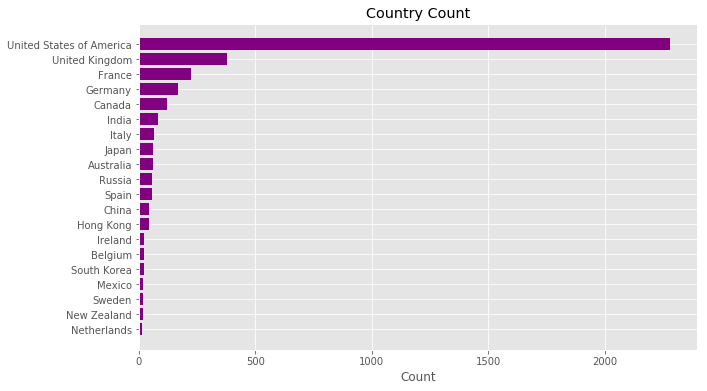

In [34]:
list_of_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_countries=Counter([i for j in list_of_countries for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data=dict(most_common_countries)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('Count')
plt.title('Country Count')
plt.show()


In [35]:
train['num_countries'] = train['production_countries'].apply(lambda x: len(x) if x != {} else 0)
train['all_countries'] = train['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    train['production_country_' + g] = train['all_countries'].apply(lambda x: 1 if g in x else 0)
    
test['num_countries'] = test['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test['all_countries'] = test['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_countries:
    test['production_country_' + g] = test['all_countries'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_countries', 'all_countries'], axis=1)
test = test.drop(['production_countries', 'all_countries'], axis=1)

## **Spoken Language**

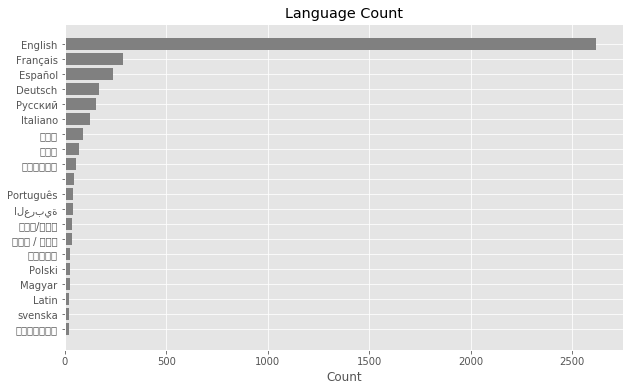

In [36]:
# English is the majority spoken language 
list_of_languages = list(train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

most_common_languages=Counter([i for j in list_of_languages for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data=dict(most_common_languages)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='gray')
plt.xlabel('Count')
plt.title('Language Count')
plt.show()

In [37]:
train['num_languages'] = train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
train['all_languages'] = train['spoken_languages'].apply(lambda x: ' '.join(sorted([i['iso_639_1'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train['language_' + g] = train['all_languages'].apply(lambda x: 1 if g in x else 0)
    
test['num_languages'] = test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test['all_languages'] = test['spoken_languages'].apply(lambda x: ' '.join(sorted([i['iso_639_1'] for i in x])) if x != {} else '')
for g in top_languages:
    test['language_' + g] = test['all_languages'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['spoken_languages', 'all_languages'], axis=1)
test = test.drop(['spoken_languages', 'all_languages'], axis=1)

## **Keywords**

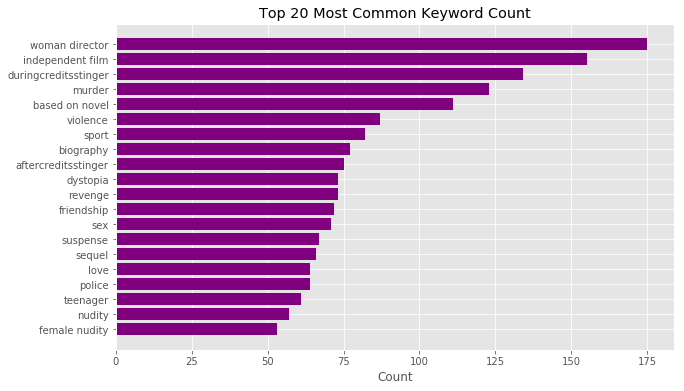

In [38]:
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

most_common_keywords=Counter([i for j in list_of_keywords for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data=dict(most_common_keywords)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('Count')
plt.title('Top 20 Most Common Keyword Count')
plt.show()


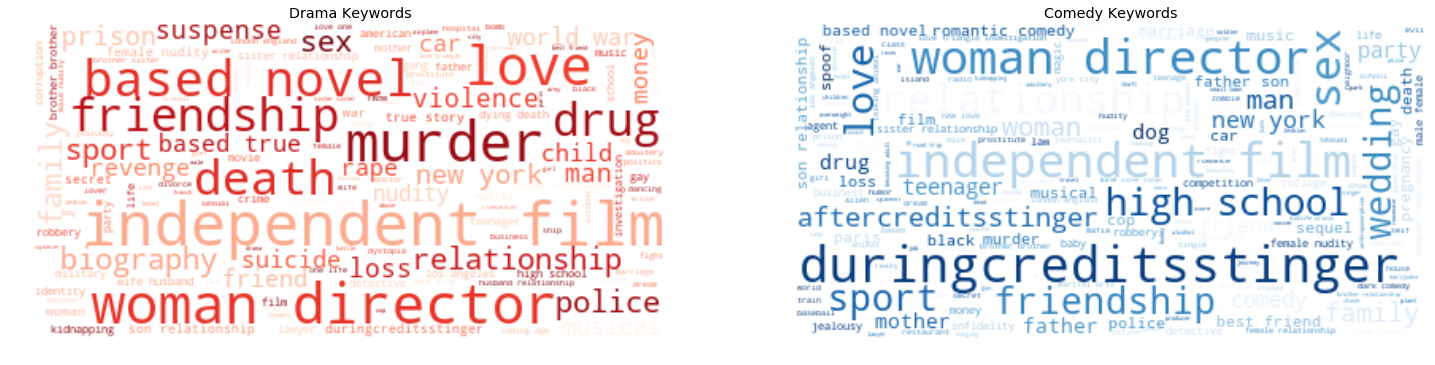

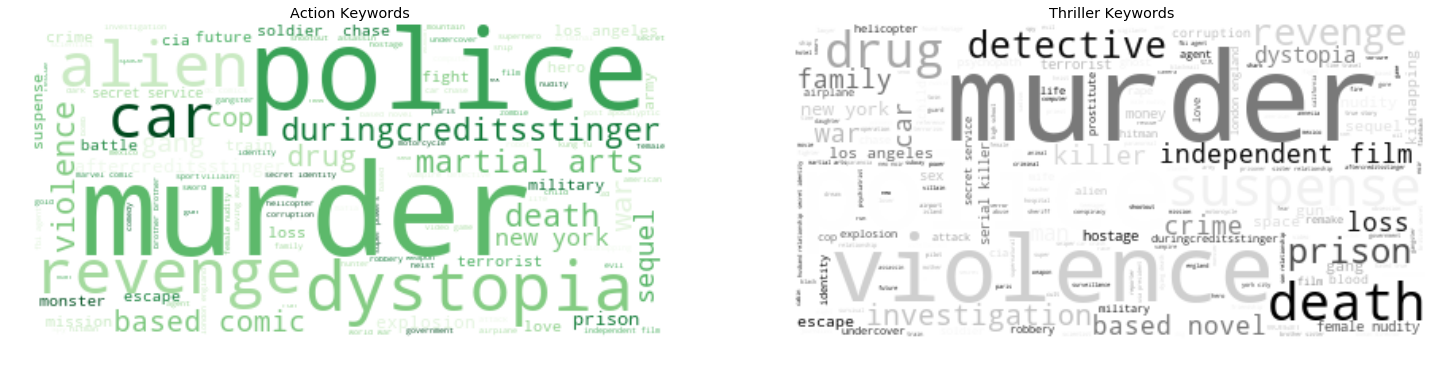

In [39]:
# Text analysis on keywords by top 4 genres


text_drama = " ".join(review for review in drama['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else ''))
text_comedy = " ".join(review for review in comedy['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else ''))
text_action = " ".join(review for review in action['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else ''))
text_thriller = " ".join(review for review in thriller['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else ''))


wordcloud1 = WordCloud(stopwords=stopwords, background_color="white",colormap="Reds").generate(text_drama)
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white",colormap="Blues").generate(text_comedy)
wordcloud3 = WordCloud(stopwords=stopwords, background_color="white",colormap="Greens").generate(text_action)
wordcloud4 = WordCloud(stopwords=stopwords, background_color="white",colormap="Greys").generate(text_thriller)


fig = plt.figure(figsize=(25, 20))

plt.subplot(221)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Drama Keywords')
plt.axis("off")

plt.subplot(222)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Comedy Keywords')
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(25, 20))

plt.subplot(223)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title('Action Keywords')
plt.axis("off")

plt.subplot(224)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.title('Thriller Keywords')
plt.axis("off")
plt.show()

In [40]:
train['num_Keywords'] = train['Keywords'].apply(lambda x: len(x) if x != {} else 0)
train['all_Keywords'] = train['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]
for g in top_keywords:
    train['keyword_' + g] = train['all_Keywords'].apply(lambda x: 1 if g in x else 0)
    
test['num_Keywords'] = test['Keywords'].apply(lambda x: len(x) if x != {} else 0)
test['all_Keywords'] = test['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_keywords:
    test['keyword_' + g] = test['all_Keywords'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['Keywords', 'all_Keywords'], axis=1)
test = test.drop(['Keywords', 'all_Keywords'], axis=1)

## **Cast**

In [41]:
list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train['num_cast'] = train['cast'].apply(lambda x: len(x) if x != {} else 0)
train['all_cast'] = train['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(30)]
for g in top_cast_names:
    train['cast_name_' + g] = train['all_cast'].apply(lambda x: 1 if g in x else 0)

    
test['num_cast'] = test['cast'].apply(lambda x: len(x) if x != {} else 0)
test['all_cast'] = test['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_cast_names:
    test['cast_name_' + g] = test['all_cast'].apply(lambda x: 1 if g in x else 0)

Text(0.5, 0, 'Revenue (100 million dollars)')

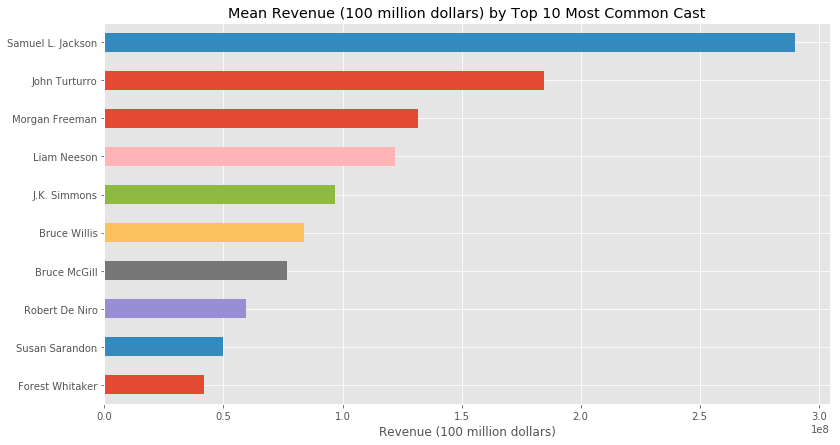

In [42]:
#Mean revenue comparison of 10 most common actor/actress 

cast_name_Samuel_L_Jackson=train.loc[train['cast_name_Samuel L. Jackson']==1,]
cast_name_Robert_De_Niro=train.loc[train['cast_name_Robert De Niro']==1,]
cast_name_Morgan_Freeman=train.loc[train['cast_name_Morgan Freeman']==1,]
cast_name_J_K_Simmons=train.loc[train['cast_name_J.K. Simmons']==1,]
cast_name_Bruce_Willis=train.loc[train['cast_name_Bruce Willis']==1,]
cast_name_Liam_Neeson=train.loc[train['cast_name_Liam Neeson']==1,]
cast_name_Susan_Sarandon=train.loc[train['cast_name_Susan Sarandon']==1,]
cast_name_Bruce_McGill=train.loc[train['cast_name_Bruce McGill']==1,]
cast_name_John_Turturro=train.loc[train['cast_name_John Turturro']==1,]
cast_name_Forest_Whitaker=train.loc[train['cast_name_Forest Whitaker']==1,]


cast_name_Samuel_L_Jackson_revenue=cast_name_Samuel_L_Jackson.mean()['revenue']
cast_name_Robert_De_Niro_revenue=cast_name_Robert_De_Niro.mean()['revenue']
cast_name_Morgan_Freeman_revenue=cast_name_Morgan_Freeman.mean()['revenue']
cast_name_J_K_Simmons_revenue=cast_name_J_K_Simmons.mean()['revenue']
cast_name_Bruce_Willis_revenue=cast_name_Bruce_Willis.mean()['revenue']
cast_name_Liam_Neeson_revenue=cast_name_Liam_Neeson.mean()['revenue']
cast_name_Susan_Sarandon_revenue=cast_name_Susan_Sarandon.mean()['revenue']
cast_name_Bruce_McGill_revenue=cast_name_Bruce_McGill.mean()['revenue']
cast_name_John_Turturro_revenue=cast_name_John_Turturro.mean()['revenue']
cast_name_Forest_Whitaker_revenue=cast_name_Forest_Whitaker.mean()['revenue']


cast_revenue_concat = pd.Series([cast_name_Samuel_L_Jackson_revenue,cast_name_Robert_De_Niro_revenue,cast_name_Morgan_Freeman_revenue,cast_name_J_K_Simmons_revenue,
                                cast_name_Bruce_Willis_revenue,cast_name_Liam_Neeson_revenue,cast_name_Susan_Sarandon_revenue,cast_name_Bruce_McGill_revenue,
                                cast_name_John_Turturro_revenue,cast_name_Forest_Whitaker_revenue])
cast_revenue_concat.index=['Samuel L. Jackson','Robert De Niro','Morgan Freeman','J.K. Simmons','Bruce Willis','Liam Neeson','Susan Sarandon','Bruce McGill',
                            'John Turturro','Forest Whitaker']


fig = plt.figure(figsize=(13, 7))
cast_revenue_concat.sort_values(ascending=True).plot(kind='barh',title='Mean Revenue (100 million dollars) by Top 10 Most Common Cast')
plt.xlabel('Revenue (100 million dollars)')

![](https://cdn3.movieweb.com/i/article/NfXngO3xqCPpg6RXrqozbo6CgJbcRI/798:50/Avengers-4-Casting-Call-Nick-Fury-Samuel-L.jpg) <br>
<center>Nick is getting roughly 290 million in USD per movie released...😲 </center>

In [43]:
# Consider other factors like gender and characters 

list_of_cast_genders = list(train['cast'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
list_of_cast_characters = list(train['cast'].apply(lambda x: [i['character'] for i in x] if x != {} else []).values)


train['genders_0'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
for g in top_cast_characters:
    train['cast_character_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
    

test['genders_0'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for g in top_cast_characters:
    test['cast_character_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)

train = train.drop(['cast'], axis=1)
test = test.drop(['cast'], axis=1)

## **Crew**

In [44]:
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train['num_crew'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)
train['all_crew'] = train['crew'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_crew_names = [m[0] for m in Counter([i for j in list_of_crew_names for i in j]).most_common(30)]
for g in top_crew_names:
    train['crew_name_' + g] = train['all_crew'].apply(lambda x: 1 if g in x else 0)

test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)
test['all_crew'] = test['crew'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_crew_names:
    test['crew_name_' + g] = test['all_crew'].apply(lambda x: 1 if g in x else 0)

Text(0.5, 0, 'Revenue (100 million dollars)')

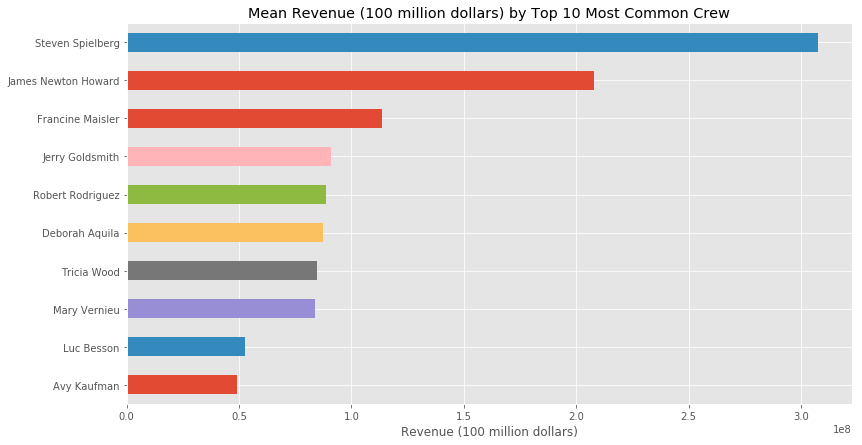

In [45]:
crew_name_Avy_Kaufman=train.loc[train['crew_name_Avy Kaufman']==1,]
crew_name_Robert_Rodriguez=train.loc[train['crew_name_Robert Rodriguez']==1,]
crew_name_Deborah_Aquila=train.loc[train['crew_name_Deborah Aquila']==1,]
crew_name_James_Newton_Howard=train.loc[train['crew_name_James Newton Howard']==1,]
crew_name_Mary_Vernieu=train.loc[train['crew_name_Mary Vernieu']==1,]
crew_name_Steven_Spielberg=train.loc[train['crew_name_Steven Spielberg']==1,]
crew_name_Luc_Besson=train.loc[train['crew_name_Luc Besson']==1,]
crew_name_Jerry_Goldsmith=train.loc[train['crew_name_Jerry Goldsmith']==1,]
crew_name_Francine_Maisler=train.loc[train['crew_name_Francine Maisler']==1,]
crew_name_Tricia_Wood=train.loc[train['crew_name_Tricia Wood']==1,]


crew_name_Avy_Kaufman_revenue=crew_name_Avy_Kaufman.mean()['revenue']
crew_name_Robert_Rodriguez_revenue=crew_name_Robert_Rodriguez.mean()['revenue']
crew_name_Deborah_Aquila_revenue=crew_name_Deborah_Aquila.mean()['revenue']
crew_name_James_Newton_Howard_revenue=crew_name_James_Newton_Howard.mean()['revenue']
crew_name_Mary_Vernieu_revenue=crew_name_Mary_Vernieu.mean()['revenue']
crew_name_Steven_Spielberg_revenue=crew_name_Steven_Spielberg.mean()['revenue']
crew_name_Luc_Besson_revenue=crew_name_Luc_Besson.mean()['revenue']
crew_name_Jerry_Goldsmith_revenue=crew_name_Jerry_Goldsmith.mean()['revenue']
crew_name_Francine_Maisler_revenue=crew_name_Francine_Maisler.mean()['revenue']
crew_name_Tricia_Wood_revenue=crew_name_Tricia_Wood.mean()['revenue']


crew_revenue_concat = pd.Series([crew_name_Avy_Kaufman_revenue,crew_name_Robert_Rodriguez_revenue,crew_name_Deborah_Aquila_revenue,crew_name_James_Newton_Howard_revenue,
                                crew_name_Mary_Vernieu_revenue,crew_name_Steven_Spielberg_revenue,crew_name_Luc_Besson_revenue,crew_name_Jerry_Goldsmith_revenue,
                                crew_name_Francine_Maisler_revenue,crew_name_Tricia_Wood_revenue])
crew_revenue_concat.index=['Avy Kaufman','Robert Rodriguez','Deborah Aquila','James Newton Howard','Mary Vernieu','Steven Spielberg','Luc Besson','Jerry Goldsmith',
                            'Francine Maisler','Tricia Wood']


fig = plt.figure(figsize=(13, 7))
crew_revenue_concat.sort_values(ascending=True).plot(kind='barh',title='Mean Revenue (100 million dollars) by Top 10 Most Common Crew')
plt.xlabel('Revenue (100 million dollars)')

![](http://www.squareeyed.tv/wp-content/uploads/2015/12/Steven-Spielberg-3.jpg) <br>
<center> Steven Spieberg is getting roughly 310 million in USD per movie released...😲 </center>

In [46]:
# Consider other factors like crew jobs, gender, and department 

list_of_crew_jobs = list(train['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
list_of_crew_genders = list(train['crew'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
list_of_crew_departments = list(train['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)


train['genders_0'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
for g in top_cast_characters:
    train['crew_character_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)
top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)]
for j in top_crew_jobs:
    train['jobs_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
for j in top_crew_departments:
    train['departments_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 
    

    
test['genders_0'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for g in top_cast_characters:
    test['crew_character_' + g] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)
for j in top_crew_jobs:
    test['jobs_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
for j in top_crew_departments:
    test['departments_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

train = train.drop(['crew'], axis=1)
test = test.drop(['crew'], axis=1)

# **Feature Engineering** <br><br>
The distribution of revenue is quite skewed. I am going to use log transformation on revenue to deal with skewed data.

Skew of revenue attribute: 4.5


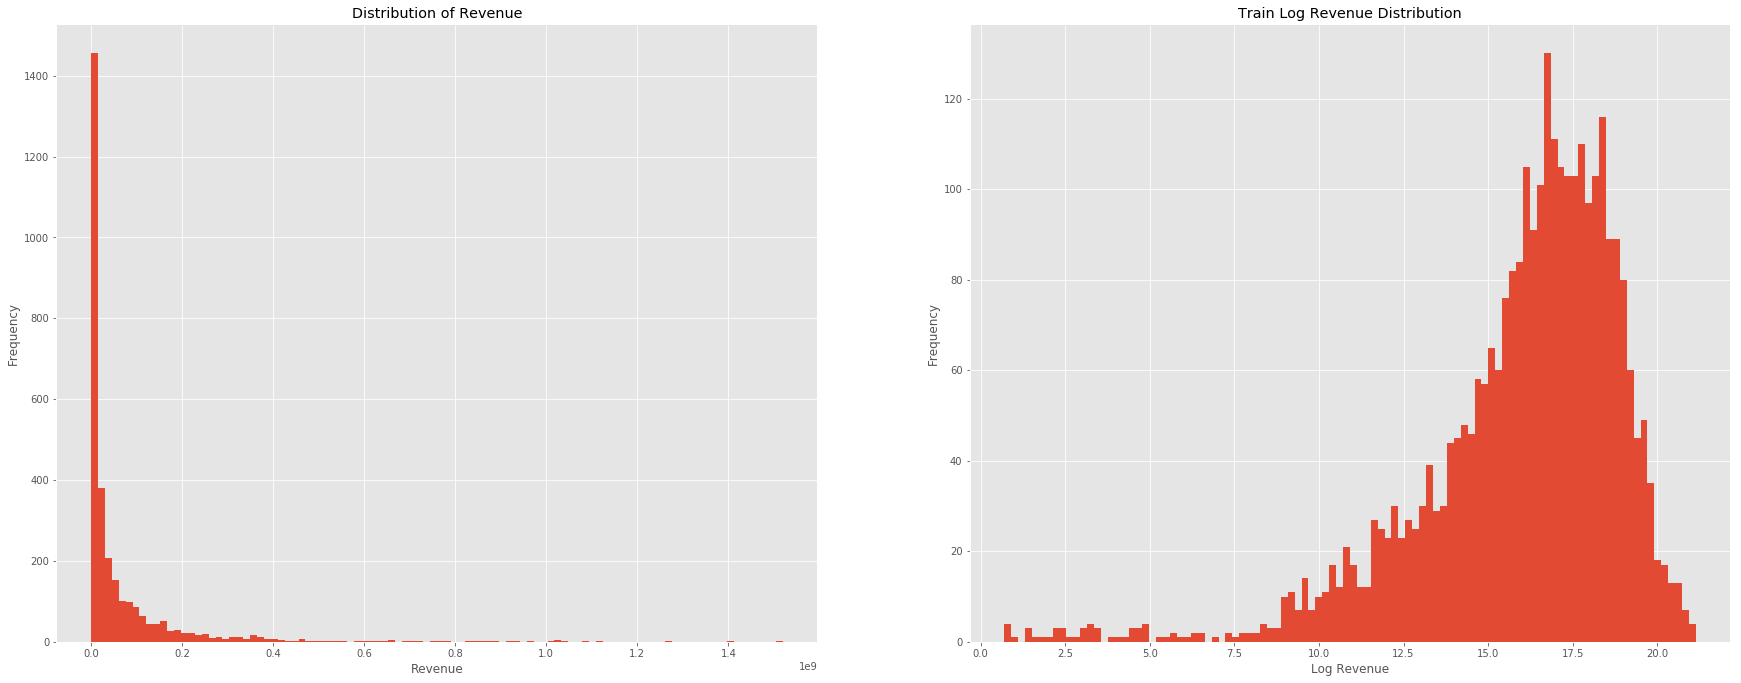

In [47]:
# Plot the distribution of the revenue

fig = plt.figure(figsize=(30, 25))

plt.subplot(221)
train['revenue'].plot(kind='hist',bins=100)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')

plt.subplot(222)
np.log1p(train['revenue']).plot(kind='hist',bins=100)
plt.title('Train Log Revenue Distribution')
plt.xlabel('Log Revenue')


print('Skew of revenue attribute: %0.1f' % skew(train['revenue']))

In [48]:
# Adjusting other skewed variables such as popularity and budget

print('Skew of train budget attribute: %0.1f' % skew(train['budget']))
print('Skew of test budget attribute: %0.1f' % skew(test['budget']))
print('Skew of train popularity attribute: %0.1f' % skew(train['popularity']))
print('Skew of test popularity attribute: %0.1f' % skew(test['popularity']))

Skew of train budget attribute: 3.1
Skew of test budget attribute: 2.7
Skew of train popularity attribute: 14.4
Skew of test popularity attribute: 23.7


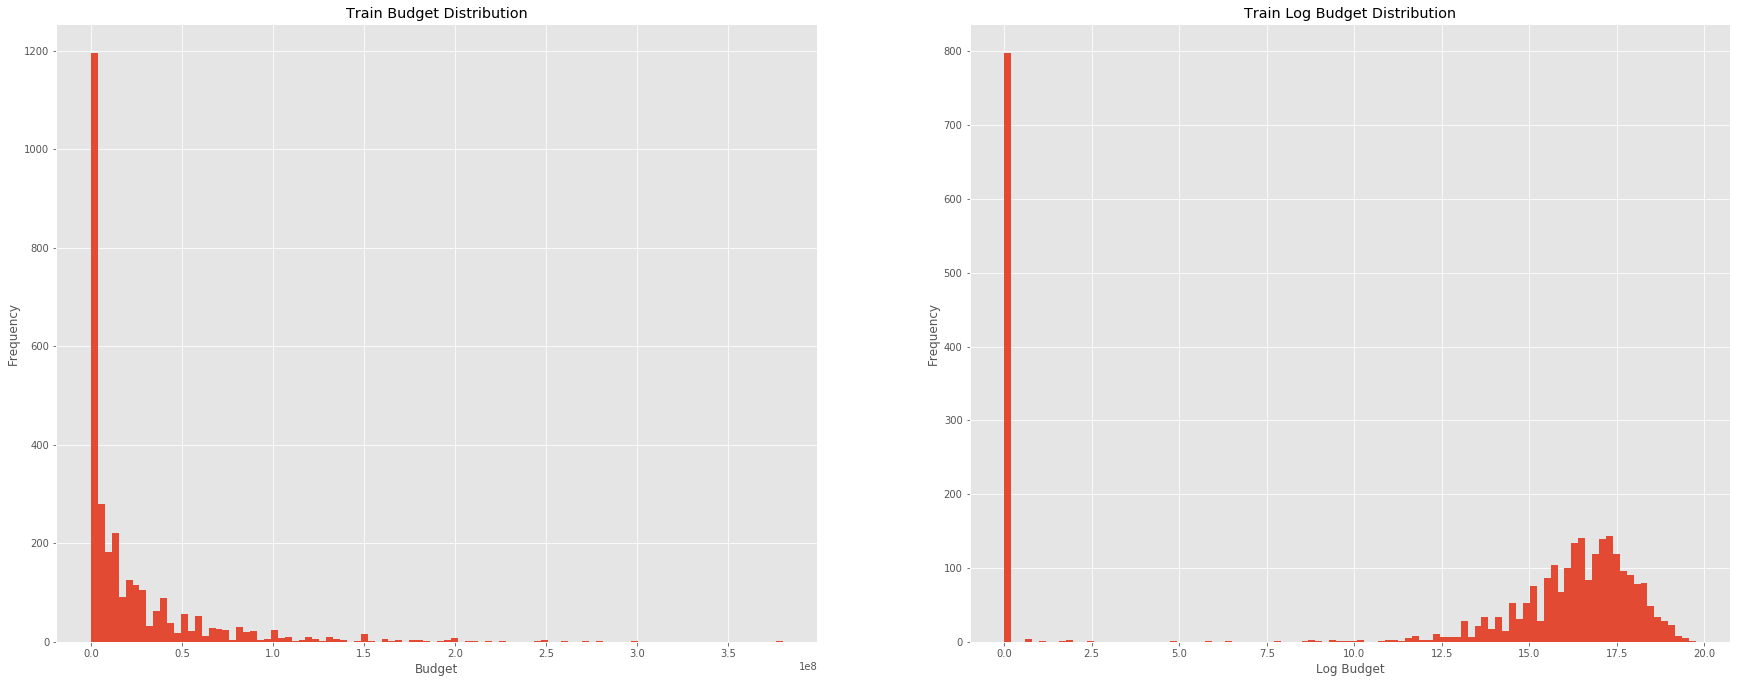

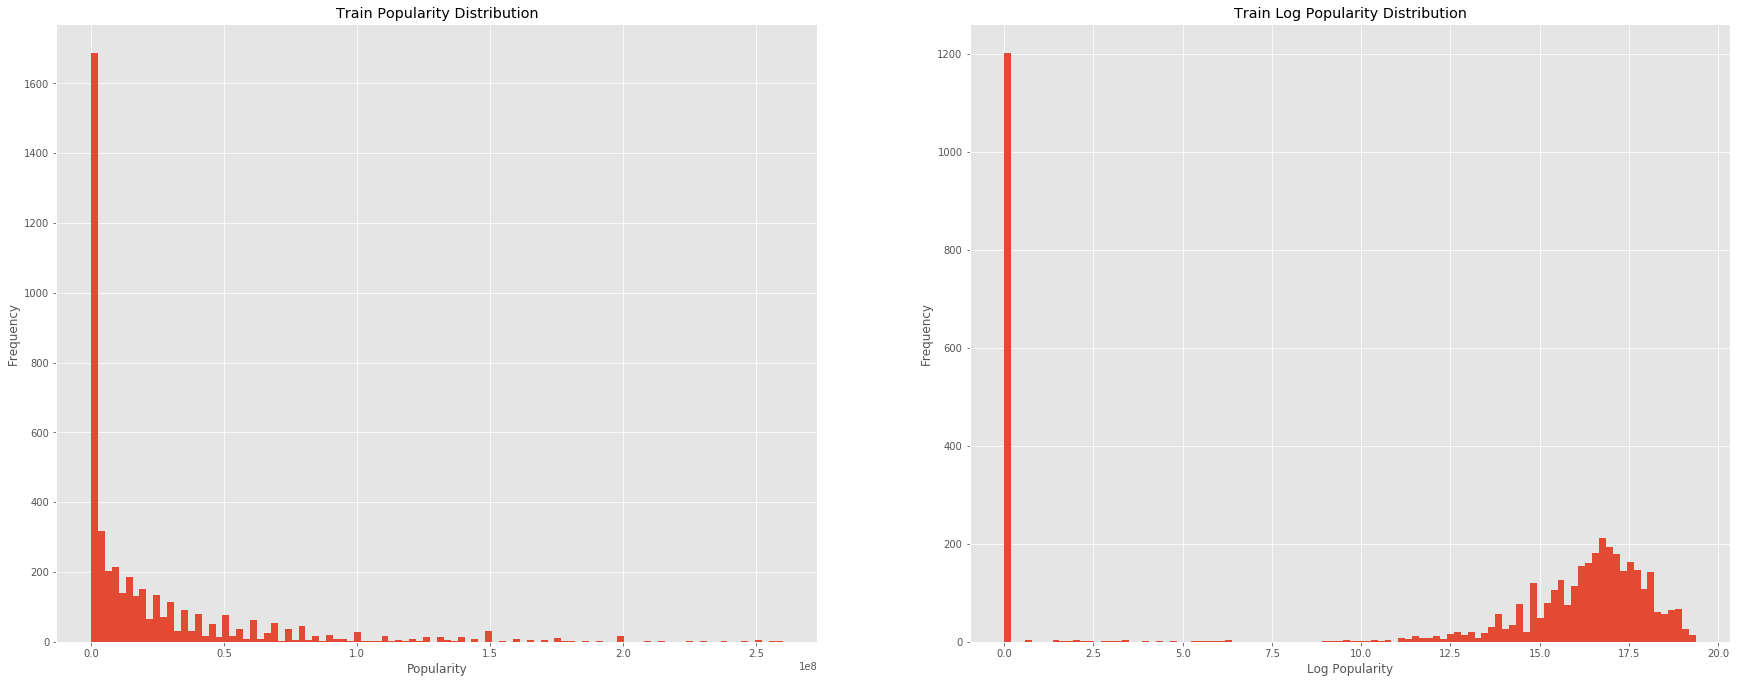

In [49]:
# Before log transformation and after log transformation for train budget and train popularity 
fig = plt.figure(figsize=(30, 25))

plt.subplot(221)
train['budget'].plot(kind='hist',bins=100)
plt.title('Train Budget Distribution')
plt.xlabel('Budget')

plt.subplot(222)
np.log1p(train['budget']).plot(kind='hist',bins=100)
plt.title('Train Log Budget Distribution')
plt.xlabel('Log Budget')

plt.show()

fig = plt.figure(figsize=(30, 25))

plt.subplot(223)
test['budget'].plot(kind='hist',bins=100)
plt.title('Train Popularity Distribution')
plt.xlabel('Popularity')

plt.subplot(224)
np.log1p(test['budget']).plot(kind='hist',bins=100)
plt.title('Train Log Popularity Distribution')
plt.xlabel('Log Popularity')
plt.show()


In [50]:
# Revising budget variable 

power_six = train.id[train.budget > 1000][train.revenue < 100]

for k in power_six :
    train.loc[train['id'] == k,'revenue'] =  train.loc[train['id'] == k,'revenue'] * 1000000

In [51]:
# Putting log variables for skewed data 
train['log_budget']=np.log1p(train['budget'])
test['log_budget']=np.log1p(test['budget'])
train['log_popularity']=np.log1p(train['popularity'])
test['log_popularity']=np.log1p(test['popularity'])

In [52]:
def prepare(df):
    df['_budget_runtime_ratio'] = df['budget']/df['runtime'] 
    df['_budget_popularity_ratio'] = df['budget']/df['popularity']
    df['_budget_year_ratio'] = df['budget']/(df['release_year']*df['release_year'])
    df['_releaseYear_popularity_ratio'] = df['release_year']/df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity']/df['release_year']
    df['_year_to_log_budget'] = df['release_year'] / df['log_budget']
    df['_year_to_log_popularity'] = df['release_year'] / df['log_popularity']

    df['has_homepage'] = 0
    df.loc[pd.isnull(df['homepage']) ,"has_homepage"] = 1
    
    df['isTaglineNA'] = 0
    df.loc[df['tagline'] == 0 ,"isTaglineNA"] = 1 
    
    df['isTitleDifferent'] = 1
    df.loc[ df['original_title'] == df['title'] ,"isTitleDifferent"] = 0 

    df['isMovieReleased'] = 1
    df.loc[ df['status'] != "Released" ,"isMovieReleased"] = 0 

    df['original_title_letter_count'] = df['original_title'].str.len() 
    df['original_title_word_count'] = df['original_title'].str.split().str.len() 
    df['title_word_count'] = df['title'].str.split().str.len()
    df['overview_word_count'] = df['overview'].str.split().str.len()
    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    df['meanruntimeByYear'] = df.groupby("release_year")["runtime"].aggregate('mean')
    df['meanPopularityByYear'] = df.groupby("release_year")["popularity"].aggregate('mean')
    df['meanBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('mean')

    return df

train_new=prepare(train)
test_new=prepare(test)


In [53]:
train_new.to_csv("train_new.csv", index=False)
test_new.to_csv("test_new.csv", index=False)

In [54]:
drop_columns=['homepage','imdb_id','poster_path','status','title', 'release_date','tagline', 'overview', 'original_title','all_genres','all_cast',
             'original_language','collection_name','all_crew']
train_new=train_new.drop(drop_columns,axis=1)
test_new=test_new.drop(drop_columns,axis=1)

In [55]:
print( "updated train dataset:", train_new.shape,"\n","updated test dataset: ",test_new.shape)

# Just double checking the difference of variables between train and test 
print(train_new.columns.difference(test_new.columns)) # good to go! 

updated train dataset: (3000, 289) 
 updated test dataset:  (4398, 288)
Index(['revenue'], dtype='object')


In [56]:
# Formating for modeling

X = train_new.drop(['id', 'revenue'], axis=1)
y = np.log1p(train_new['revenue'])
X_test = test_new.drop(['id'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [57]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)
lgb_model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

eli5.show_weights(lgb_model, feature_filter=lambda x: x != '<BIAS>')

Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.25433	valid_1's rmse: 2.30062
[2000]	training's rmse: 0.957069	valid_1's rmse: 2.27431
Early stopping, best iteration is:
[2786]	training's rmse: 0.790087	valid_1's rmse: 2.26406


Weight,Feature
0.3129,_year_to_log_budget
0.0656,release_year
0.0624,_budget_year_ratio
0.0360,budget
0.0353,runtime
0.0347,_year_to_log_popularity
0.0323,_releaseYear_popularity_ratio
0.0294,genders_2
0.0269,popularity
0.0258,_budget_runtime_ratio


## **Random Search vs. Grid Search**
<br>
While waiting for Random Search doing the job, I will write down the difference between Grid Search and Random Search. <br>Both of them are commonly used hyperparameter optimization tools. However, I prefer to use Random Search, and here is why....<br>First of all, Grid Search takes so much time! I was actually waiting for Grid Search to be done for like 1 hour and found out that I could also use Random Search. <br><br>
<center><div style="width: 300px; font-size:80%; text-align:center;"><img src="https://media.giphy.com/media/RKS1pHGiUUZ2g/giphy.gif " ,> Me waiting for Grid Search to be done</div></center><br>
**Grid Search** tries every combination of a list of values of the hyperparameters that we set and evaluates the model for each combination, while **Random Search** takes random combinations of the hyperparameters to find the best combination for building a model. The chances of finding the optimal parameter are comparatively higher in random search because Random Search end up being trained on the optimized parameters without any aliasing ([Random Search for Hyper-Parameter Optimization paper](http://www.jmlr.org/papers/v13/bergstra12a.html)). If you want to know more about their difference, [Deepak's medium article](https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318) is very helpful.

In [58]:
"""
Taking too much time! (I also put too many combinations)

# Print the best parameters found
gridParams = {
    "max_depth": [5,6,7,8],
    "min_data_in_leaf": [15,20,25,30],
    'learning_rate': [0.01,0.005],
    'num_leaves': [15,20,25,30,35,40],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'random_state' : [501], # Updated from 'seed'
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4]
    }

grid_search = GridSearchCV(lgb_model, n_jobs=-1, param_grid=gridParams, cv = 3, verbose=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


Random_Search_Params ={
    "max_depth": [4,5,6],
    "min_data_in_leaf": [15,20,25],
    'learning_rate': [0.01,0.005],
    'num_leaves': [25,30,35,40],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'random_state' : [501] # Updated from 'seed'
    }

n_HP_points_to_test = 50

random_search = RandomizedSearchCV(
    estimator=lgb_model, param_distributions= Random_Search_Params, 
    n_iter=n_HP_points_to_test,
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

random_search.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(random_search.best_score_, random_search.best_params_))

# Using parameters already set above, replace in the best from the random search

params['learning_rate'] = random_search.best_params_['learning_rate']
params['max_depth'] = random_search.best_params_['max_depth']
params['num_leaves'] = random_search.best_params_['num_leaves']
params['reg_alpha'] = random_search.best_params_['reg_alpha']
params['reg_lambda'] = random_search.best_params_['reg_lambda']


"""

'\nTaking too much time! (I also put too many combinations)\n\n# Print the best parameters found\ngridParams = {\n    "max_depth": [5,6,7,8],\n    "min_data_in_leaf": [15,20,25,30],\n    \'learning_rate\': [0.01,0.005],\n    \'num_leaves\': [15,20,25,30,35,40],\n    \'boosting_type\' : [\'gbdt\'],\n    \'objective\' : [\'regression\'],\n    \'random_state\' : [501], # Updated from \'seed\'\n    \'reg_alpha\' : [1,1.2],\n    \'reg_lambda\' : [1,1.2,1.4]\n    }\n\ngrid_search = GridSearchCV(lgb_model, n_jobs=-1, param_grid=gridParams, cv = 3, verbose=5)\ngrid_search.fit(X_train, y_train)\nprint(grid_search.best_params_)\nprint(grid_search.best_score_)\n\n\nRandom_Search_Params ={\n    "max_depth": [4,5,6],\n    "min_data_in_leaf": [15,20,25],\n    \'learning_rate\': [0.01,0.005],\n    \'num_leaves\': [25,30,35,40],\n    \'boosting_type\' : [\'gbdt\'],\n    \'objective\' : [\'regression\'],\n    \'random_state\' : [501] # Updated from \'seed\'\n    }\n\nn_HP_points_to_test = 50\n\nrandom_

<center>While waiting for Random Search to do the job, watching Panda is a very productive thing to do...! Gotta love pandas ❤️️🐼</center> <br><br>
    
    
<center><iframe width="560" height="315" src="https://www.youtube.com/embed/1v6M41Divso?start=21" frameborder="0" allowfullscreen></iframe></center>

In [59]:
# Obtain from Random Search 

opt_parameters = {'random_state': 501, 'objective': 'regression', 'num_leaves': 40, 'min_data_in_leaf': 15, 'max_depth': 4, 'learning_rate': 0.01, 'boosting_type': 'gbdt'} 

params['learning_rate'] = opt_parameters['learning_rate']
params['max_depth'] = opt_parameters['max_depth']
params['num_leaves'] = opt_parameters['num_leaves']
params['min_data_in_leaf'] = opt_parameters['min_data_in_leaf']

In [60]:
n_fold = 5
random_seed=2222
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=True, model=None):

    oof = np.zeros(X.shape[0])
    prediction = np.zeros(X_test.shape[0])
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        if model_type == 'sklearn':
            X_train, X_valid = X[train_index], X[valid_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=500, early_stopping_rounds=200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=10000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test.values), ntree_limit=model.best_ntree_limit)

        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = mean_squared_error(y_valid, y_pred_valid)
            
            y_pred = model.predict(X_test)
            
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=10000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

Fold 0 started at Thu Apr 18 19:57:37 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's rmse: 1.67331	valid_1's rmse: 1.92229
[1000]	training's rmse: 1.48966	valid_1's rmse: 1.88126
[1500]	training's rmse: 1.33536	valid_1's rmse: 1.87057
Early stopping, best iteration is:
[1403]	training's rmse: 1.36219	valid_1's rmse: 1.86962
Fold 1 started at Thu Apr 18 19:57:40 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's rmse: 1.67853	valid_1's rmse: 1.85415
[1000]	training's rmse: 1.50367	valid_1's rmse: 1.8122
[1500]	training's rmse: 1.3644	valid_1's rmse: 1.79749
[2000]	training's rmse: 1.25127	valid_1's rmse: 1.78524
Early stopping, best iteration is:
[1999]	training's rmse: 1.25141	valid_1's rmse: 1.78515
Fold 2 started at Thu Apr 18 19:57:44 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's rmse: 1.69188	valid_1's rmse: 1.84223
[1000]	training's rmse: 1.49978	valid_1's rmse: 1.81763
[

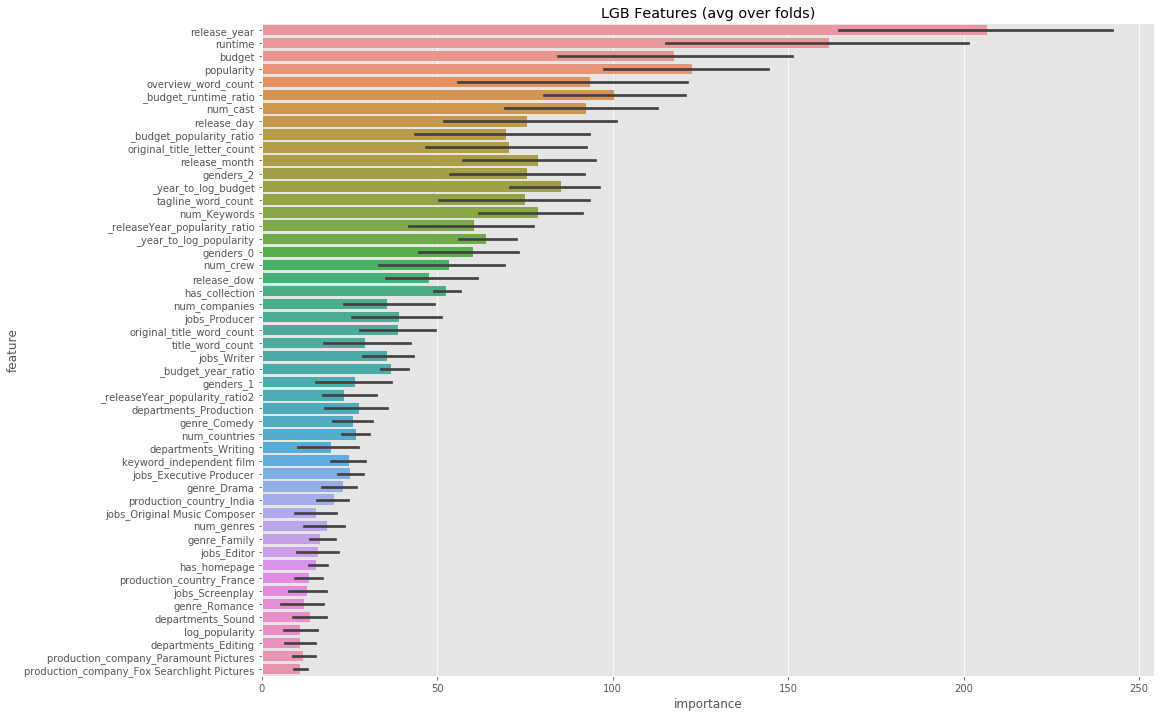

In [61]:
start = time.time()
oof_lgb, prediction_lgb, _ = train_model(X, X_test, y, params=params, model_type='lgb')
end = time.time()

print("time elapsed:",end - start, "second")

In [62]:
xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 6,
              'min_child_weight': 3,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}

start = time.time()
oof_xgb, prediction_xgb = train_model(X, X_test, y, params=xgb_params, model_type='xgb')
end = time.time()
print("time elapsed:",end - start, "second")

Fold 0 started at Thu Apr 18 19:57:55 2019
[0]	train-rmse:15.5965	valid_data-rmse:15.7602
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.20013	valid_data-rmse:1.8943
[1000]	train-rmse:0.875865	valid_data-rmse:1.87044
Stopping. Best iteration:
[901]	train-rmse:0.92976	valid_data-rmse:1.86936

Fold 1 started at Thu Apr 18 19:58:12 2019
[0]	train-rmse:15.6405	valid_data-rmse:15.585
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.23115	valid_data-rmse:1.84705
[1000]	train-rmse:0.905396	valid_data-rmse:1.80849
[1500]	train-rmse:0.689536	valid_data-rmse:1.79536
[2000]	train-rmse:0.528614	valid_data-rmse:1.78935
Stopping. Best iteration:
[2074]	train-rmse:0.507307	valid_data-rmse:1.78824

Fold 2 started at Thu Apr 18 19:58:47 2019
[0]	train-r

In [63]:
sam_sub['revenue'] = np.expm1(prediction_lgb)
sam_sub.to_csv("lgb.csv", index=False)
sam_sub['revenue'] = np.expm1(prediction_xgb)
sam_sub.to_csv("xgb.csv", index=False)
sam_sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb) / 2)
sam_sub.to_csv("blend_lgb_xgb.csv", index=False)

## **Work in Progress...** <br><br>

I will keep working on building more models until I get a better score! <br>Thank you for reading my kernel and don't forget to vote if you enjoyed my kernel 😊<br><br>
    <center><strong>Ending the kernel with the best decision-making model in this century....</strong> </center><br>
<img src="https://media.giphy.com/media/wPygVtYTyXkfC/giphy.gif "  height="400px" width="400px">

